# Perceptron
#### (Artificial Neuron)
<img src="img/neuron.png" height="500" width="500"/>








- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy (-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
plt.style.use('seaborn')

### Dataset Generation

In [83]:
X,Y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


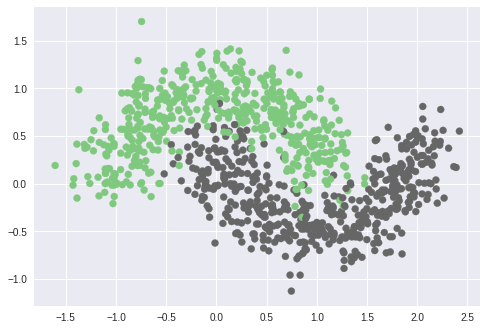

In [84]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Perceptron Implementation

In [85]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def predict(X,weights):
    z = np.dot(X,weights);
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights): # Binary Cross Entropy
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,lr):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    m = float(X.shape[0])
    weights = weights - lr*dw/m
    return weights
    
def train(X,Y,lr=0.5,maxIter=1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    losses = []
    weights = np.zeros(X.shape[1])
    for iter in range(maxIter):
        weights = update(X,Y,weights,lr)
        l = loss(X,Y,weights)
        losses.append(l)
    return losses,weights

In [86]:
losses,weights = train(X,Y,maxIter=1000)

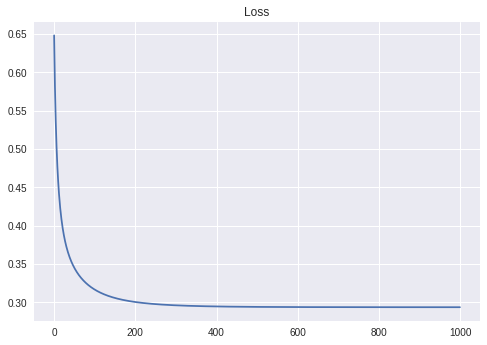

In [87]:
# Plotting the loss
plt.plot(losses)
plt.title('Loss')
plt.show()

### Making Predictions

In [88]:
def getPredictions(X_test,weights,labels=True):
    if X_test.shape[1]!=weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
    probs = predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        labels[probs<0.5] = 0
        return labels

### Visualizing the Decision Boundary

In [89]:
x1 = np.linspace(-2,3,10)
x2 = -(weights[0]+weights[1]*x1)/weights[2]

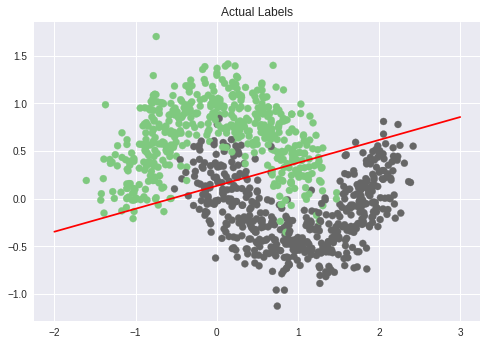

In [90]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.title('Actual Labels')
plt.show()

### Finding Accuracy

In [91]:
Y_ = getPredictions(X,weights,labels=True)
acc = np.sum(Y==Y_)/Y.shape[0]
print(acc*100,"%")

86.9 %
